### BIG-SCAPE result Dataframe - BGC Exploratory results
This notebook takes the output from BIG-SCAPE, which associates the sample BGCs with the reference (MIBIG).

In [1]:
import pandas as pd

In [93]:
# import data from full.network file
df = pd.read_csv('/home/pedro/antismash/BIG-SCAPE/2026-01-11_20-17-09_full.network', sep='\t', header=None)
df

/tmp/ipykernel_4014736/863764469.py:2: DtypeWarning: Columns (3,8,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/pedro/antismash/BIG-SCAPE/2026-01-11_20-17-09_full.network', sep='\t', header=None)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,Record_a,GBK_a,Record_Type_a,Record_Number_a,ORF_coords_a,Record_b,GBK_b,Record_Type_b,Record_Number_b,ORF_coords_b,distance,jaccard,adjacency,dss,weights,alignment_mode,extend_strategy
1,MGYG000296017_41.region001.gbk_region_1,MGYG000296017_41.region001,region,1,10:14,MGYG000296023_89.region001.gbk_region_1,MGYG000296023_89.region001,region,1,0:7,0.81,0.36,0.29,0.14,mix,GLOCAL,LEGACY
2,MGYG000296017_41.region001.gbk_region_1,MGYG000296017_41.region001,region,1,0:24,BGC0000651.gbk_region_1,BGC0000651,region,1,12:13,0.98,0.04,0.00,0.01,mix,GLOCAL,LEGACY
3,MGYG000296017_41.region001.gbk_region_1,MGYG000296017_41.region001,region,1,12:13,BGC0003157.gbk_region_1,BGC0003157,region,1,0:1,0.82,0.50,0.00,0.11,mix,GLOCAL,LEGACY
4,MGYG000296017_41.region001.gbk_region_1,MGYG000296017_41.region001,region,1,12:13,BGC0001756.gbk_region_1,BGC0001756,region,1,0:6,0.91,0.33,0.00,0.03,mix,GLOCAL,LEGACY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396927,MGYG000296065_23.region001.gbk_region_1,MGYG000296065_23.region001,region,1,0:3,BGC0003155.gbk_region_1,BGC0003155,region,1,12:20,0.86,0.36,0.2,0.07,mix,GLOCAL,LEGACY
396928,MGYG000296065_23.region001.gbk_region_1,MGYG000296065_23.region001,region,1,0:3,BGC0002167.gbk_region_1,BGC0002167,region,1,1:6,0.92,0.2,0.07,0.04,mix,GLOCAL,LEGACY
396929,BGC0003155.gbk_region_1,BGC0003155,region,1,12:13,BGC0002167.gbk_region_1,BGC0002167,region,1,0:6,0.91,0.22,0.0,0.06,mix,GLOCAL,LEGACY
396930,BGC0000815.gbk_region_1,BGC0000815,region,1,6:7,BGC0001262.gbk_region_1,BGC0001262,region,1,1:6,0.92,0.25,0.0,0.04,mix,GLOCAL,LEGACY


In [ ]:
# Quantity of inicial samples BGCs
df_only_MGYG = df[df[0].str.contains('MGYG')]
df_only_MGYG[1].value_counts()

1
MGYG000296065_187.region001    396
MGYG000296016_14.region001     361
MGYG000296049_20.region001     350
MGYG000296062_18.region001     292
MGYG000296039_1.region001      291
                              ... 
MGYG000296065_23.region001       2
MGYG000296069_1.region001        2
MGYG000296065_278.region001      1
MGYG000296075_12.region002       1
MGYG000296049_664.region001      1
Name: count, Length: 107, dtype: int64

In [94]:
# Discard lines with "BGCXXXXX" in both gbk_a and gbk_b region
df_filtered = df[~(df[1].str.contains("BGC") & df[6].str.contains("BGC"))]
df_filtered = df_filtered[~(df_filtered[1].str.contains("MGYG") & df_filtered[6].str.contains("MGYG"))]
df_filtered[[1,6]]


,1,6
0,GBK_a,GBK_b
2,MGYG000296017_41.region001,BGC0000651
3,MGYG000296017_41.region001,BGC0003157
4,MGYG000296017_41.region001,BGC0001756
5,MGYG000296017_41.region001,BGC0000666
...,...,...
396916,BGC0000402,MGYG000296065_23.region001
396920,BGC0001127,MGYG000296065_23.region001
396924,BGC0002686,MGYG000296065_23.region001
396927,MGYG000296065_23.region001,BGC0003155


In [95]:
# Transforming the first line in the columns names
df_filtered.columns = df_filtered.iloc[0]
df_filtered = df_filtered[1:]
df_filtered

,Record_a,GBK_a,Record_Type_a,Record_Number_a,ORF_coords_a,Record_b,GBK_b,Record_Type_b,Record_Number_b,ORF_coords_b,distance,jaccard,adjacency,dss,weights,alignment_mode,extend_strategy
2,MGYG000296017_41.region001.gbk_region_1,MGYG000296017_41.region001,region,1,0:24,BGC0000651.gbk_region_1,BGC0000651,region,1,12:13,0.98,0.04,0.00,0.01,mix,GLOCAL,LEGACY
3,MGYG000296017_41.region001.gbk_region_1,MGYG000296017_41.region001,region,1,12:13,BGC0003157.gbk_region_1,BGC0003157,region,1,0:1,0.82,0.50,0.00,0.11,mix,GLOCAL,LEGACY
4,MGYG000296017_41.region001.gbk_region_1,MGYG000296017_41.region001,region,1,12:13,BGC0001756.gbk_region_1,BGC0001756,region,1,0:6,0.91,0.33,0.00,0.03,mix,GLOCAL,LEGACY
5,MGYG000296017_41.region001.gbk_region_1,MGYG000296017_41.region001,region,1,13:24,BGC0000666.gbk_region_1,BGC0000666,region,1,0:7,0.93,0.14,0.10,0.05,mix,GLOCAL,LEGACY
6,MGYG000296017_41.region001.gbk_region_1,MGYG000296017_41.region001,region,1,12:24,BGC0000665.gbk_region_1,BGC0000665,region,1,0:5,0.98,0.06,0.00,0.02,mix,GLOCAL,LEGACY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396916,BGC0000402.gbk_region_1,BGC0000402,region,1,0:2,MGYG000296065_23.region001.gbk_region_1,MGYG000296065_23.region001,region,1,3:18,0.75,0.42,0.38,0.2,mix,GLOCAL,LEGACY
396920,BGC0001127.gbk_region_1,BGC0001127,region,1,8:11,MGYG000296065_23.region001.gbk_region_1,MGYG000296065_23.region001,region,1,0:18,0.73,0.38,0.39,0.24,mix,GLOCAL,LEGACY
396924,BGC0002686.gbk_region_1,BGC0002686,region,1,28:29,MGYG000296065_23.region001.gbk_region_1,MGYG000296065_23.region001,region,1,0:18,0.85,0.29,0.2,0.11,mix,GLOCAL,LEGACY
396927,MGYG000296065_23.region001.gbk_region_1,MGYG000296065_23.region001,region,1,0:3,BGC0003155.gbk_region_1,BGC0003155,region,1,12:20,0.86,0.36,0.2,0.07,mix,GLOCAL,LEGACY


In [96]:
# Dropping colunms: record_a, record_type_a, record_number_a, record_b, record_type_b, record_number_b
df_filtered = df_filtered.drop(columns=['Record_a', 'Record_Type_a', 'Record_Number_a', 'Record_b', 'Record_Type_b', 'Record_Number_b', "alignment_mode", "extend_strategy"])
df_filtered["GBK_a"] = df_filtered["GBK_a"].str.replace(r"\.region\d+", "", regex=True)
df_filtered["GBK_b"] = df_filtered["GBK_b"].str.replace(r"\.region\d+", "", regex=True)

In [97]:
coluna = "distance"

df_filtered[coluna] = pd.to_numeric(df_filtered[coluna])
print(df_filtered[coluna].describe())

count    13754.000000
mean         0.890434
std          0.089771
min          0.370000
25%          0.840000
50%          0.920000
75%          0.960000
max          1.000000
Name: distance, dtype: float64


In [98]:
# Only the lines with distance <= 0.5
df_filtered_low_distance = df_filtered[df_filtered[coluna] <= 0.8]
df_filtered_low_distance.sort_values(by="GBK_a")

,GBK_a,ORF_coords_a,GBK_b,ORF_coords_b,distance,jaccard,adjacency,dss,weights
100306,BGC0000001,14:16,MGYG000296065_187,0:2,0.59,0.89,0.75,0.26,mix
100703,BGC0000001,13:14,MGYG000296065_77,2:14,0.79,0.5,0.32,0.13,mix
162612,BGC0000003,0:1,MGYG000296065_77,11:12,0.79,0.56,0.3,0.11,mix
90570,BGC0000006,1:2,MGYG000296065_187,0:2,0.78,0.6,0.33,0.11,mix
280002,BGC0000012,4:5,MGYG000296065_77,2:3,0.76,0.67,0.4,0.12,mix
...,...,...,...,...,...,...,...,...,...
256705,MGYG000296076_4,19:20,BGC0000282,0:3,0.76,0.5,0.33,0.16,mix
256706,MGYG000296076_4,19:20,BGC0002127,0:3,0.76,0.5,0.33,0.16,mix
256730,MGYG000296076_4,19:20,BGC0003137,0:1,0.56,1.0,1.0,0.25,mix
256666,MGYG000296076_4,19:20,BGC0001905,2:4,0.79,0.5,0.33,0.13,mix


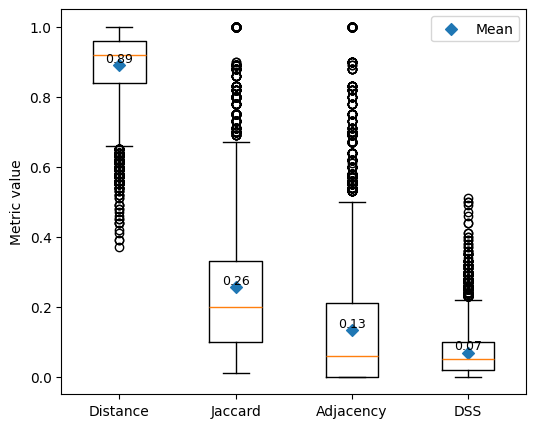

In [99]:
import matplotlib.pyplot as plt
import numpy as np

cols = ["distance", "jaccard", "adjacency", "dss"]

df_filtered[cols] = df_filtered[cols].apply(pd.to_numeric, errors="coerce")

cols = ["distance", "jaccard", "adjacency", "dss"]
data = df_filtered[cols]

means = data.mean()

plt.figure(figsize=(6, 5))
plt.boxplot(data)

# eixo x
x_pos = np.arange(1, len(cols) + 1)
plt.xticks(x_pos, ["Distance", "Jaccard", "Adjacency", "DSS"])
plt.ylabel("Metric value")

# plotar o ponto da média
plt.scatter(x_pos, means.values, marker="D", label="Mean")

# escrever o valor da média
for x, mean in zip(x_pos, means.values):
    plt.text(
        x,
        mean,
        f"{mean:.2f}",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.legend()
plt.show()


In [100]:
# Changing position of GBK_a and GBK_b if GBK_a results begins with "BGC" and GBK_b not
mask = df_filtered["GBK_a"].str.startswith("BGC") & ~df_filtered["GBK_b"].str.startswith("BGC")
df_filtered.loc[mask, ["GBK_a", "GBK_b", "ORF_coords_a", "ORF_coords_b"]] = df_filtered.loc[mask, ["GBK_b", "GBK_a", "ORF_coords_b", "ORF_coords_a"]].values
df_filtered

,GBK_a,ORF_coords_a,GBK_b,ORF_coords_b,distance,jaccard,adjacency,dss,weights
2,MGYG000296017_41,0:24,BGC0000651,12:13,0.98,0.04,0.00,0.01,mix
3,MGYG000296017_41,12:13,BGC0003157,0:1,0.82,0.50,0.00,0.11,mix
4,MGYG000296017_41,12:13,BGC0001756,0:6,0.91,0.33,0.00,0.03,mix
5,MGYG000296017_41,13:24,BGC0000666,0:7,0.93,0.14,0.10,0.05,mix
6,MGYG000296017_41,12:24,BGC0000665,0:5,0.98,0.06,0.00,0.02,mix
...,...,...,...,...,...,...,...,...,...
396916,MGYG000296065_23,3:18,BGC0000402,0:2,0.75,0.42,0.38,0.20,mix
396920,MGYG000296065_23,0:18,BGC0001127,8:11,0.73,0.38,0.39,0.24,mix
396924,MGYG000296065_23,0:18,BGC0002686,28:29,0.85,0.29,0.20,0.11,mix
396927,MGYG000296065_23,0:3,BGC0003155,12:20,0.86,0.36,0.20,0.07,mix


### Improving the df with new informations
In this section we import the bgcs_reference.csv that have the information about the class, sub-class, compound name and compound struture of MIBIG reference.

In [117]:
df_ref = pd.read_csv('/home/pedro/antismash/BIG-SCAPE/bgcs_reference.csv')
df_ref.drop(columns=['Unnamed: 0'], inplace=True)
df_ref

,reference_name,class,subclass,cyclase,compound_name,compound_structure
0,BGC0002199,other,other,NaN,nanangelenin A,CC1(C)CC[C@@H](O)[C@@]2(C)[C@H]1[C@H](O)C=C1CO...
1,BGC0001553,NRPS;PKS,Type I;Unknown,NaN,clifednamide A,C[C@@H]1C[C@@H]2[C@H]3C[C@H]4/C=C/C(=C5C(=O)[C...
2,BGC0002367,NRPS,Type I,NaN,rotihibin A,CCCCCCC/C=C/C(=O)N[C@H](CCCNC(=O)N)C(=O)N[C@H]...
3,BGC0002377,NRPS,Type I,NaN,WS9326B;WS9326A;WS9326G;WS9326F,CCC/C=C\C1=CC=CC=C1/C=C/C(=O)N[C@H]2[C@H](OC(=...
4,BGC0002397,terpene,Unknown,NaN,astallatene,NaN
...,...,...,...,...,...,...
3008,BGC0001128,NRPS,Type I,NaN,gamexpeptide C,CC(C[C@@H]1C(N[C@@H](CC(C)C)C(N[C@H](C(C)C)C(N...
3009,BGC0002754,NRPS,Type I,NaN,hectoramide B,CN([C@@H](CC1=CC=C(C=C1)OC)C(O[C@H](C(N([C@H](...
3010,BGC0002276,NRPS,Type I,NaN,choline,NaN
3011,BGC0001330,NRPS;PKS,Type I;Type I,NaN,BE-43547A1;BE-43547A2;BE-43547B1;BE-43547B2;BE...,CC1C(OC(=O)CN(C(=O)/C=C/C(=C)NC(=O)CNC(=O)C(C1...


In [118]:
df_ref_filtered = df_ref[['reference_name', 'class', 'compound_name']]
df_ref_filtered = df_ref_filtered.rename(columns={'reference_name': 'GBK_b'})
df_ref_filtered

,GBK_b,class,compound_name
0,BGC0002199,other,nanangelenin A
1,BGC0001553,NRPS;PKS,clifednamide A
2,BGC0002367,NRPS,rotihibin A
3,BGC0002377,NRPS,WS9326B;WS9326A;WS9326G;WS9326F
4,BGC0002397,terpene,astallatene
...,...,...,...
3008,BGC0001128,NRPS,gamexpeptide C
3009,BGC0002754,NRPS,hectoramide B
3010,BGC0002276,NRPS,choline
3011,BGC0001330,NRPS;PKS,BE-43547A1;BE-43547A2;BE-43547B1;BE-43547B2;BE...


In [119]:
# Uniting df_filtered with df_ref_filtered to add class and compound_name information
df_final = pd.merge(df_filtered, df_ref_filtered, on='GBK_b', how='left')
df_final[["GBK_b", "class", "compound_name"]].value_counts()

GBK_b       class     compound_name                                                         
BGC0000649  terpene   carotenoid                                                                47
BGC0000643  terpene   carotenoid                                                                47
BGC0000642  terpene   carotenoid                                                                47
BGC0000641  terpene   carotenoid                                                                47
BGC0000640  terpene   carotenoid                                                                47
                                                                                                ..
BGC0000144  PKS       salinomycin                                                                1
BGC0001620  NRPS;PKS  ilamycin B1;ilamycin B2;ilamycin C1;ilamycin C2;ilamycin D;ilamycin E1     1
BGC0003154  NRPS;PKS  cyclopiazonic acid                                                         1
BGC0003151  PKS 

In [120]:
df_final

,GBK_a,ORF_coords_a,GBK_b,ORF_coords_b,distance,jaccard,adjacency,dss,weights,class,compound_name
0,MGYG000296017_41,0:24,BGC0000651,12:13,0.98,0.04,0.00,0.01,mix,terpene,KS-505a
1,MGYG000296017_41,12:13,BGC0003157,0:1,0.82,0.50,0.00,0.11,mix,terpene,Talaropentaene
2,MGYG000296017_41,12:13,BGC0001756,0:6,0.91,0.33,0.00,0.03,mix,terpene,retigeranin;arathanatriene
3,MGYG000296017_41,13:24,BGC0000666,0:7,0.93,0.14,0.10,0.05,mix,terpene,xiamycin A
4,MGYG000296017_41,12:24,BGC0000665,0:5,0.98,0.06,0.00,0.02,mix,terpene;other,xiamycin;indosespene;sespenine;dixiamycin A;di...
...,...,...,...,...,...,...,...,...,...,...,...
13749,MGYG000296065_23,3:18,BGC0000402,0:2,0.75,0.42,0.38,0.20,mix,NRPS,paenilarvin A;paenilarvin B;paenilarvin C
13750,MGYG000296065_23,0:18,BGC0001127,8:11,0.73,0.38,0.39,0.24,mix,NRPS,jagaricin
13751,MGYG000296065_23,0:18,BGC0002686,28:29,0.85,0.29,0.20,0.11,mix,NRPS,madurastatin D1;madurastatin D2;(-)-Madurastat...
13752,MGYG000296065_23,0:3,BGC0003155,12:20,0.86,0.36,0.20,0.07,mix,NRPS;saccharide,streptothricin F


In [121]:
# Final quantity of samples BGCs
df_final["GBK_a"].value_counts()

GBK_a
MGYG000296016_14     566
MGYG000296062_35     565
MGYG000296065_60     553
MGYG000296065_77     546
MGYG000296065_187    546
                    ... 
MGYG000296065_189      6
MGYG000296066_25       6
MGYG000296016_8        5
MGYG000296069_159      5
MGYG000296049_664      5
Name: count, Length: 105, dtype: int64

In [ ]:
# EXPLORATORY EXAMPLE
# Only the lines where GBK_a is equal to MGYG000296016_14
df_final_2 = df_final[df_final["GBK_a"] == "MGYG000296016_14"]
df_final_2

,GBK_a,ORF_coords_a,GBK_b,ORF_coords_b,distance,jaccard,adjacency,dss,weights,class,compound_name
79,MGYG000296016_14,0:31,BGC0001675,35:37,0.96,0.09,0.04,0.03,mix,PKS,murayaquinone
212,MGYG000296016_14,13:14,BGC0003126,0:5,0.91,0.20,0.11,0.06,mix,PKS,kotanin
257,MGYG000296016_14,13:14,BGC0002847,0:6,0.94,0.17,0.07,0.04,mix,PKS,olivetolic acid;sphaerophorolcarboxylic acid;2...
292,MGYG000296016_14,17:31,BGC0000195,0:7,0.95,0.11,0.05,0.03,mix,PKS,alnumycin A;alnumycin B;alnumycin C;alnumycin ...
299,MGYG000296016_14,17:18,BGC0002594,0:8,0.93,0.14,0.08,0.05,mix,PKS,orcinol;orsellinic acid
...,...,...,...,...,...,...,...,...,...,...,...
7241,MGYG000296016_14,13:31,BGC0002559,0:6,0.96,0.10,0.05,0.03,mix,PKS,lenoremycin
7242,MGYG000296016_14,0:14,BGC0000194,16:22,0.95,0.11,0.06,0.04,mix,PKS,actinorhodin
7243,MGYG000296016_14,13:31,BGC0000253,0:11,0.94,0.14,0.05,0.04,mix,PKS,oviedomycin
7244,MGYG000296016_14,13:31,BGC0001204,0:8,0.97,0.07,0.03,0.01,mix,PKS,versipelostatin


In [ ]:
# EXPLORATORY EXAMPLE
df_final_2.sort_values(by="dss", ascending=False)

,GBK_a,ORF_coords_a,GBK_b,ORF_coords_b,distance,jaccard,adjacency,dss,weights,class,compound_name
7227,MGYG000296016_14,10:11,BGC0003137,0:1,0.58,1.00,1.00,0.23,mix,PKS,Flavokermesic acid
7101,MGYG000296016_14,10:11,BGC0000282,0:3,0.73,0.50,0.33,0.21,mix,PKS,"2-methoxy-5-methyl-6-(13-methyltetradecyl)-1,4..."
1947,MGYG000296016_14,10:11,BGC0002865,0:1,0.60,1.00,1.00,0.20,mix,PKS,Aloesone
5067,MGYG000296016_14,10:11,BGC0001310,0:2,0.70,0.67,0.50,0.19,mix,PKS,naringenin
7102,MGYG000296016_14,10:11,BGC0002127,0:3,0.76,0.50,0.33,0.17,mix,PKS,"flaviolin;1,3,6,8-tetrahydroxynaphthalene"
...,...,...,...,...,...,...,...,...,...,...,...
7196,MGYG000296016_14,0:31,BGC0002087,18:19,0.98,0.07,0.03,0.01,mix,NRPS;PKS,gladiostatin A
4685,MGYG000296016_14,13:14,BGC0002616,0:7,0.98,0.06,0.00,0.01,mix,PKS,mycophenolic acid
4847,MGYG000296016_14,13:31,BGC0002106,0:11,0.97,0.08,0.04,0.01,mix,PKS,rimocidin
570,MGYG000296016_14,0:31,BGC0002090,0:23,0.98,0.04,0.02,0.01,mix,PKS;NRPS,undecylprodigiosin;metacycloprodigiosin


### Filtering the best References BGCs for each sample BGC.
Selecting the pairs with the lowest distance.

In [123]:
# Selecting the lowest distance for each GBK_a value
df_final['distance'] = pd.to_numeric(df_final['distance'], errors='coerce')
df_best_result = df_final.loc[df_final.groupby('GBK_a')['distance'].idxmin()]
df_best_result

,GBK_a,ORF_coords_a,GBK_b,ORF_coords_b,distance,jaccard,adjacency,dss,weights,class,compound_name
8432,MGYG000296006_405,0:1,BGC0002398,1:2,0.47,1.00,1.00,0.38,mix,terpene,(-)-ent-quiannulatene
9554,MGYG000296006_71,1:4,BGC0002132,7:8,0.74,0.67,0.50,0.14,mix,ribosomal,group 1 methanobactin
10098,MGYG000296008_2,7:8,BGC0002283,0:4,0.71,0.50,0.40,0.23,mix,terpene,sodorifen
4920,MGYG000296008_22,11:13,BGC0000924,0:4,0.81,0.50,0.33,0.10,mix,other,pyrrolnitrin
507,MGYG000296008_6,10:11,BGC0003157,0:1,0.82,0.50,0.00,0.10,mix,terpene,Talaropentaene
...,...,...,...,...,...,...,...,...,...,...,...
2165,MGYG000296075_3,9:10,BGC0001198,0:3,0.79,0.50,0.33,0.12,mix,terpene,(+)-O-methylkolavelool
9802,MGYG000296075_4,14:17,BGC0000536,2:5,0.71,0.67,0.33,0.18,mix,ribosomal,nisin Q
5728,MGYG000296076_1,9:10,BGC0000656,0:3,0.91,0.33,0.00,0.04,mix,terpene,zeaxanthin
7825,MGYG000296076_10,8:10,BGC0000647,0:2,0.60,1.00,1.00,0.19,mix,terpene,carotenoid


In [124]:
df_best_result["class"].value_counts()

class
terpene      46
ribosomal    23
other        14
NRPS          9
PKS           7
NRPS;PKS      4
PKS;other     1
PKS;NRPS      1
Name: count, dtype: int64

In [125]:
df_best_result.sort_values(by="distance", ascending=True)

,GBK_a,ORF_coords_a,GBK_b,ORF_coords_b,distance,jaccard,adjacency,dss,weights,class,compound_name
5742,MGYG000296040_1,8:11,BGC0000656,0:3,0.37,1.00,1.00,0.51,mix,terpene,zeaxanthin
6187,MGYG000296065_77,7:12,BGC0002648,0:4,0.39,1.00,0.69,0.50,mix,PKS,eicosapentaenoic acid
7807,MGYG000296015_34,3:6,BGC0000852,0:3,0.41,1.00,1.00,0.46,mix,other,ectoine
8790,MGYG000296042_51,0:1,BGC0002397,1:2,0.44,1.00,1.00,0.41,mix,terpene,astallatene
5172,MGYG000296065_187,0:2,BGC0000017,7:9,0.44,1.00,1.00,0.41,mix,PKS;other,anatoxin-a;homoanatoxin-a
...,...,...,...,...,...,...,...,...,...,...,...
7890,MGYG000296065_40,26:27,BGC0002163,0:2,0.92,0.33,0.00,0.02,mix,other,fusatin;fusatinic acid;8-oxo-fusatin;8-oxo-iso...
5726,MGYG000296020_1,7:8,BGC0000656,0:3,0.92,0.25,0.00,0.04,mix,terpene,zeaxanthin
4346,MGYG000296039_4,5:6,BGC0002132,0:5,0.92,0.25,0.00,0.05,mix,ribosomal,group 1 methanobactin
9664,MGYG000296044_19,10:11,BGC0001862,1:5,0.94,0.17,0.00,0.03,mix,ribosomal,pallidocin


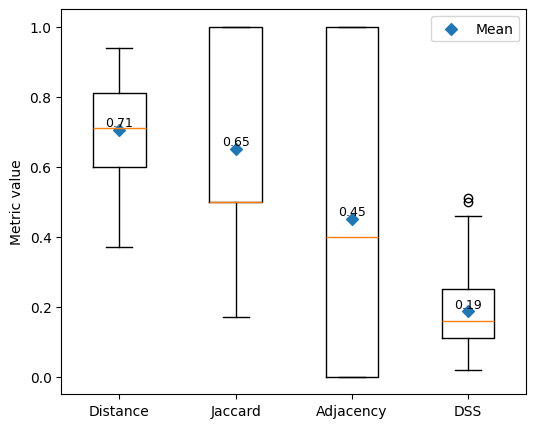

In [126]:
cols = ["distance", "jaccard", "adjacency", "dss"]

df_best_result[cols] = df_best_result[cols].apply(pd.to_numeric, errors="coerce")
data = df_best_result[cols]

means = data.mean()

plt.figure(figsize=(6, 5))
plt.boxplot(data)

# eixo x
x_pos = np.arange(1, len(cols) + 1)
plt.xticks(x_pos, ["Distance", "Jaccard", "Adjacency", "DSS"])
plt.ylabel("Metric value")

# plotar o ponto da média
plt.scatter(x_pos, means.values, marker="D", label="Mean")

# escrever o valor da média
for x, mean in zip(x_pos, means.values):
    plt.text(
        x,
        mean,
        f"{mean:.2f}",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.legend()
plt.show()

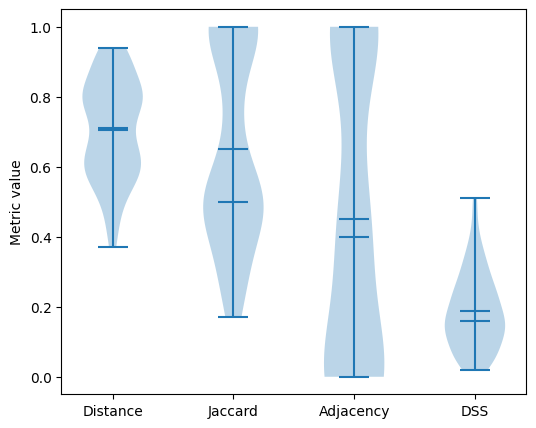

In [127]:
plt.figure(figsize=(6, 5))
plt.violinplot(
    df_best_result[["distance", "jaccard", "adjacency", "dss"]],
    showmeans=True,
    showmedians=True
)
plt.xticks([1, 2, 3, 4], ["Distance", "Jaccard", "Adjacency", "DSS"])
plt.ylabel("Metric value")
plt.show()
